# Library Analysis

This is the second part of my analysis. If you want to see the how I was able to get all my data, go find my Technical Analysis on my github. In this section, I will be analysing data to answer some of my question I formulated at the start of the project. 

## Questions:

- On average, what is the cheapeast day to buy my library?
- Which shop provides the cheapest prices of games? The most expensive?
- For each game, what is the best shop to buy games and the worse?

## Cleaning:

In [15]:
import requests
import pandas as pd
import datetime
import time
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
folder_path = "C:\\Users\\carza\\Documents\\python projects\\Api projects\\Sales"
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f)
    all_df.append(df)
    
library = pd.concat(all_df, ignore_index=True)

In [6]:
library.to_csv('library.csv', index=False) 

In [7]:
library=pd.read_csv('library.csv')

## Analysis

In [8]:
library.head()

,Time,title,steamAppID,storeID,price,retailprice,savings,storeName
0,2025-01-13,NieR: Automata,524220.0,1,39.99,39.99,0.0,Steam
1,2025-01-13,NieR Replicant ver.1.22474487139...,1113560.0,1,59.99,59.99,0.0,Steam
2,2025-01-13,Persona 5 Royal,1687950.0,1,59.99,59.99,0.0,Steam
3,2025-01-13,Persona 3 Reload,2161700.0,1,69.99,69.99,0.0,Steam
4,2025-01-13,Persona 4 Golden,1113000.0,1,19.99,19.99,0.0,Steam


In [43]:
store_sav=library.groupby(['storeName'])['savings'].mean().sort_values(ascending=False).round().reset_index()
store_sav

,storeName,savings
0,GameBillet,39.0
1,Gamesplanet,33.0
2,IndieGala,32.0
3,GOG,32.0
4,Voidu,30.0
5,Fanatical,29.0
6,WinGameStore,28.0
7,GamersGate,28.0
8,Humble Store,26.0
9,DLGamer,23.0


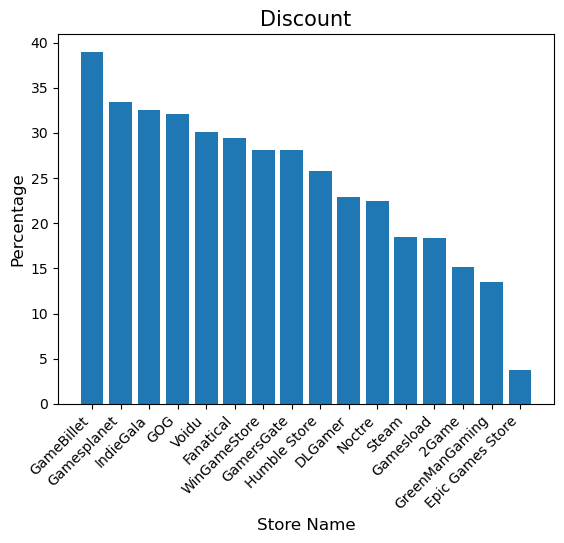

In [34]:
plt.bar(store_sav['storeName'], store_sav['savings'])
plt.title('Discount',fontsize=15)
plt.xlabel('Store Name',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In this bar graph, we can see that GameBillet gives the most discounted games for my entire library at around a 39% discount price. At the other side of the chart, the Epic Game Store provides the least discounts for my library at around 4% discount.

In [44]:
game_sav=library.groupby(['title'])['savings'].mean().sort_values(ascending=False).round().reset_index()
game_sav

,title,savings
0,XCOM 2: War of the Chosen,31.0
1,MONSTER HUNTER RISE,31.0
2,FINAL FANTASY X/X-2 HD Remaster,31.0
3,NieR Replicant ver.1.22474487139...,30.0
4,Persona 5 Royal,28.0
5,MONSTER HUNTER: WORLD,25.0
6,Persona 3 Reload,24.0
7,Persona 4 Golden,21.0
8,Metaphor: ReFantazio,18.0
9,NieR: Automata,17.0


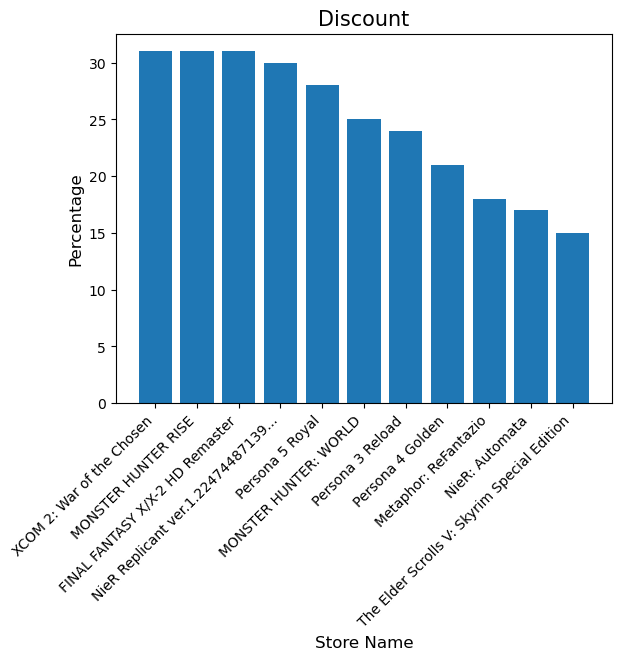

In [46]:
plt.bar(game_sav['title'], game_sav['savings'])
plt.title('Discount',fontsize=15)
plt.xlabel('Store Name',fontsize=12)
plt.ylabel('Percentage',fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()